In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# 데이터 불러오기

In [2]:
df = pd.read_csv("속초-고성_맛집.csv", encoding = 'cp949')
df.head()

,title,search_point,etc,view_count,review_count,address,dongname
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,"4,174",10,강원도 속초시 대포동 964-13,강원도 속초시 대포동
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,"34,739",17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,"30,457",38,강원도 속초시 청호동 842,강원도 속초시 청호동
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,"24,858",14,강원도 속초시 장사동 525-3,강원도 속초시 장사동
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,"16,463",14,강원도 속초시 교동 780-55,강원도 속초시 교동


In [3]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1143 non-null   object 
 1   search_point  1143 non-null   float64
 2   etc           1143 non-null   object 
 3   view_count    1143 non-null   object 
 4   review_count  1143 non-null   int64  
 5   address       1143 non-null   object 
 6   dongname      1143 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [4]:
df["view_count"]

0        4,174
1       34,739
2       30,457
3       24,858
4       16,463
         ...  
1138       119
1139       119
1140       117
1141       104
1142       104
Name: view_count, Length: 1143, dtype: object

# 데이터 전처리

## 데이터 타입 변경(obj -> int)

In [5]:
# 데이터의 "," 제거
df["view_count"] = df["view_count"].str.replace(",", "")

In [6]:
# 데이터 타입 변경 : object -> int
df["view_count"] = df["view_count"].astype(int)

In [7]:
# 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1143 non-null   object 
 1   search_point  1143 non-null   float64
 2   etc           1143 non-null   object 
 3   view_count    1143 non-null   int32  
 4   review_count  1143 non-null   int64  
 5   address       1143 non-null   object 
 6   dongname      1143 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 58.2+ KB


# 데이터 특성 확인

In [8]:
df.describe()

,search_point,view_count,review_count
count,1143.000000,1143.000000,1143.000000
mean,0.342257,3595.352581,3.805774
std,1.097397,13379.869446,15.477482
min,0.000000,4.000000,0.000000
25%,0.000000,558.000000,0.000000
50%,0.000000,1000.000000,1.000000
75%,0.000000,2046.000000,2.000000
max,4.500000,297917.000000,286.000000


In [9]:
len(df)

1143

<AxesSubplot:>

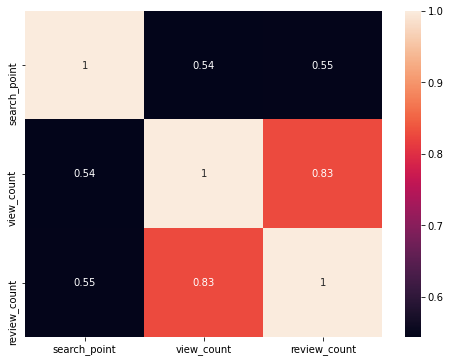

In [10]:
# column끼리 연관성
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

- search_point / veiw_count & review_count
> 총 2그룹으로 나누어 평가

## search_point(별점)

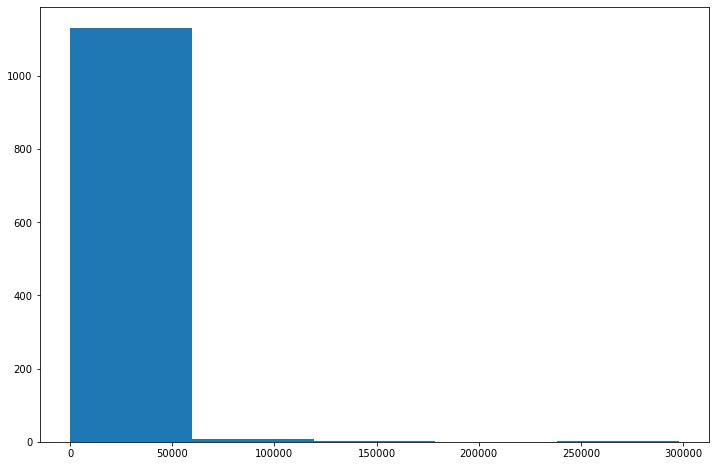

In [11]:
# search_point hist
plt.figure(figsize=(12,8))
plt.hist(df["view_count"], bins=5)
plt.show()

In [12]:
# 별점이 존재하는 식당만 인덱싱
df_point = df[df['search_point'] != 0]

In [13]:
# 별점이 있는 식당의 분포
df_point.describe()

,search_point,view_count,review_count
count,102.000000,102.000000,102.000000
mean,3.835294,26151.215686,30.578431
std,0.295393,37769.065964,43.384634
min,3.100000,973.000000,4.000000
25%,3.625000,6065.750000,10.000000
50%,3.800000,15172.000000,14.000000
75%,4.000000,31325.500000,33.000000
max,4.500000,297917.000000,286.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='search_point', ylabel='count'>

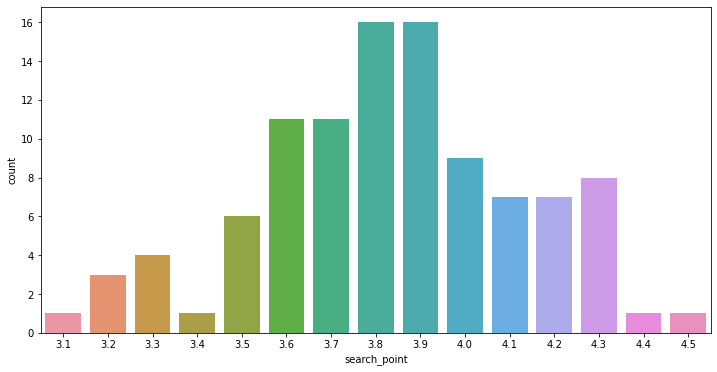

In [14]:
# 별점 countplot
plt.figure(figsize=(12, 6))
sns.countplot(df_point['search_point'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='search_point', ylabel='Density'>

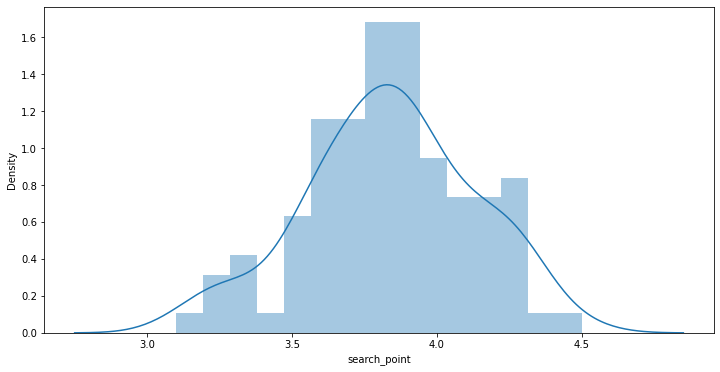

In [15]:
# 별점 distplot
plt.figure(figsize=(12, 6))
sns.distplot(df_point['search_point'], bins=15)

- 기준(30점) : 최상위권 별점 > 상위권 별점 > 평균 별점 > nan값 > 하위권 별점
- 총 1143건 중 102건의 별점을 가진 식당 존재 
- 평균 : 3.84 점
- Q1 : 3.63 점 (0 점수)
- Q2 : 3.8 점 (+ 점수)
- Q3 : 4 점 (++ 점수)
- 최고 기준 : 4.4 점 (+++점수)

최종 결과(30점) : 
>- 최상위권 별점(4.4 이상 - 30점)
>- 상위권 별점(4.1 이상 - 25점)
>- 평균 별점(3.8 이상 - 20점)
>- nan값 (15 점)
>- 하위권 별점 (3.6 미만 - 12점)

문제 - 3.6 이상 3.8 미만의 가게? 12점 ~ 20점(8점)의 차이

In [36]:
# 별점 점수 부여
df["score_search_point"] = float(0)
df.head()

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,0.0
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,0.0
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,0.0
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,0.0
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,0.0


In [84]:
# score 함수 생성
def score_search_point(data):
    if data >= 4.4:
        return 30
    elif (data < 4.4) & (data >= 4.1):
        return 25
    elif (data < 4.1) & (data >= 3.8):
        return 20
    elif (data < 3.6) & (data >= 3.1):
        return 12
    else:
        return 15

In [85]:
# 실행
df["score_search_point"] = df["search_point"].apply(score_search_point)
df["score_search_point"]

0       30
1       30
2       25
3       25
4       25
        ..
1138    15
1139    15
1140    15
1141    15
1142    15
Name: score_search_point, Length: 1143, dtype: int64

In [86]:
# 확인
df

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,10
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,10
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,10
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,10
...,...,...,...,...,...,...,...,...,...
1138,해바라기식당,0.0,강원 고성군 - 해산물 요리,119,0,강원도 고성군 거진읍 거진리 29-3,강원도 고성군 거진읍,15,3
1139,메트로폴리스,0.0,강원 고성군 - 카페 / 디저트,119,0,강원도 고성군 죽왕면 문암진리 81-25,강원도 고성군 죽왕면,15,3
1140,BBQ치킨(고성대진점),0.0,강원 고성군 - 닭 / 오리 요리,117,0,강원도 고성군 현내면 대진리 111-7,강원도 고성군 현내면,15,3
1141,일차돌(고성점),0.0,강원 고성군 - 고기 요리,104,0,강원도 고성군 간성읍 신안리 248-2,강원도 고성군 간성읍,15,3


## view_count(뷰)

In [87]:
df.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.342257,3595.352581,3.805774,15.358705,4.688539
std,1.097397,13379.869446,15.477482,1.790941,2.029796
min,0.000000,4.000000,0.000000,12.000000,3.000000
25%,0.000000,558.000000,0.000000,15.000000,3.000000
50%,0.000000,1000.000000,1.000000,15.000000,5.000000
75%,0.000000,2046.000000,2.000000,15.000000,7.000000
max,4.500000,297917.000000,286.000000,30.000000,10.000000


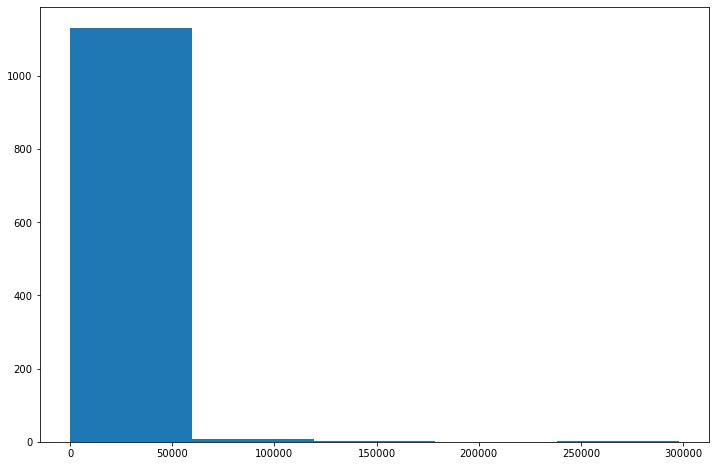

In [88]:
# view_count hist
plt.figure(figsize=(12,8))
plt.hist(df["view_count"], bins=5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view_count', ylabel='Density'>

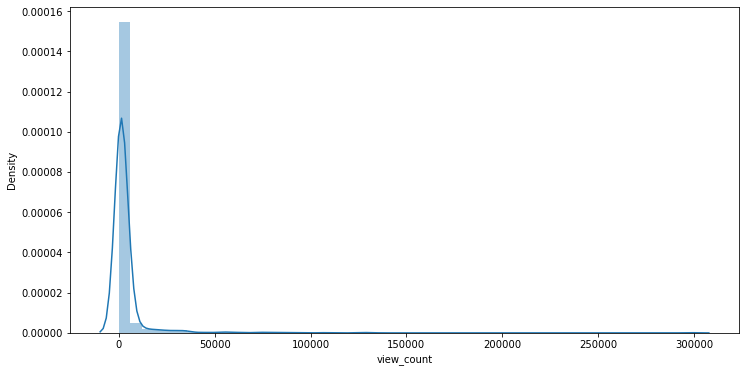

In [89]:
# view_count distplot
plt.figure(figsize=(12, 6))
sns.distplot(df['view_count'])

In [90]:
df.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.342257,3595.352581,3.805774,15.358705,4.688539
std,1.097397,13379.869446,15.477482,1.790941,2.029796
min,0.000000,4.000000,0.000000,12.000000,3.000000
25%,0.000000,558.000000,0.000000,15.000000,3.000000
50%,0.000000,1000.000000,1.000000,15.000000,5.000000
75%,0.000000,2046.000000,2.000000,15.000000,7.000000
max,4.500000,297917.000000,286.000000,30.000000,10.000000


In [91]:
# 상위 25% 데이터 확인
df_view_25 = df[df["view_count"] > 2046]
df_view_25

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,10
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,10
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,10
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,10
...,...,...,...,...,...,...,...,...,...
1001,송원,0.0,강원 고성군 - 기타 한식,2176,0,강원도 고성군 토성면 원암리 403-1,강원도 고성군 토성면,15,7
1013,고성한우촌,0.0,강원 고성군 - 고기 요리,2983,0,강원도 고성군 간성읍 신안리 175-5,강원도 고성군 간성읍,15,7
1014,최왕골족발보쌈,0.0,강원 고성군 - 고기 요리,2354,0,강원도 고성군 간성읍 신안리 247-3,강원도 고성군 간성읍,15,7
1015,88반점,0.0,강원 고성군 - 정통 중식 / 일반 중식,2215,0,강원도 고성군 거진읍 거진리 158-76,강원도 고성군 거진읍,15,7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view_count', ylabel='Density'>

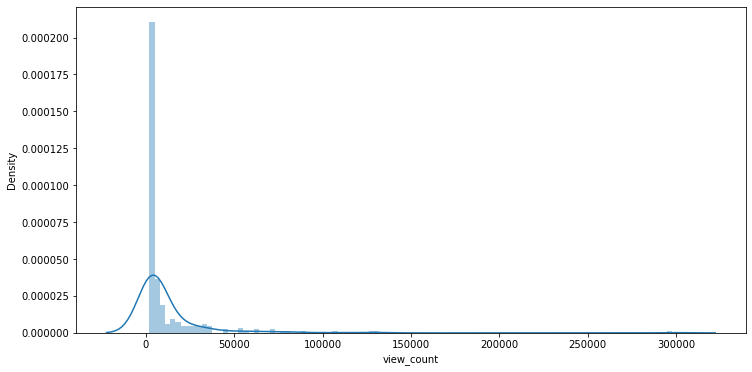

In [92]:
# 최상위권 뷰 distplot
plt.figure(figsize=(12, 6))
sns.distplot(df_view_25['view_count'], bins=100)

In [93]:
df_view_25.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1.313287,11849.968531,12.839161,16.356643,7.671329
std,1.829897,25007.901829,29.100829,3.271151,1.252513
min,0.000000,2047.000000,0.000000,12.000000,7.000000
25%,0.000000,2700.250000,2.000000,15.000000,7.000000
50%,0.000000,3934.000000,5.000000,15.000000,7.000000
75%,3.700000,8840.750000,11.000000,15.000000,7.000000
max,4.500000,297917.000000,286.000000,30.000000,10.000000


In [94]:
# 이상치 찾기
df_view_25['view_count'].sort_values(ascending=False)

16     297917
11     130551
17     126331
19     106341
9       88477
        ...  
902      2074
101      2073
938      2069
917      2063
514      2047
Name: view_count, Length: 286, dtype: int32

In [95]:
# 이상치
df_view_25.loc[16]

title                        청초수물회(속초본점)
search_point                         4.1
etc                      강원 속초시 - 해산물 요리
view_count                        297917
review_count                         286
address               강원도 속초시 조양동 1555-1
dongname                     강원도 속초시 조양동
score_search_point                    25
score_view_count                      10
Name: 16, dtype: object

- 기준(10점) : 최상위권 뷰 > 상위권 뷰 > 평균 뷰 > 하위권 뷰
- 총 1,143건 중 최소 뷰가 4다. 
- 평균 : 3,595 뷰
- Q1 : 558 뷰 (0 점수)
- Q2 : 1,000 뷰 (+ 점수)
- Q3 : 2,046 뷰 (++ 점수)
- 최고 기준(5% 수준) : 8,840 뷰 (+++점수)

최종 결과(10점) : 
>- 최상위권 뷰(  이상 - 10점)
>- 상위권 뷰( 이상 - 7점)
>- 평균 뷰( 이상 - 5점)
>- 하위권 뷰 ( 미만 - 3점)

문제 - 상위 5%도 8,840 뷰 이상인데 상위 25%의 평균은 11,849 뷰 압도적인 이상치(297,917 뷰)가 존재

In [96]:
# 이상치(10,000 뷰 이상) 제외
df_view_out = df[df["view_count"] < 10000]
df_view_out

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7
7,마카오박,4.3,강원 속초시 - 카페 / 디저트,973,9,강원도 속초시 중앙동 479-29,강원도 속초시 중앙동,25,3
8,사돈집,4.3,강원 속초시 - 탕 / 찌개 / 전골,8042,9,강원도 속초시 영랑동 133,강원도 속초시 영랑동,25,7
14,아바이옛날식당,4.2,강원 속초시 - 기타 한식,8952,10,강원도 속초시 청호동 870,강원도 속초시 청호동,25,7
15,아루나,4.2,강원 속초시 - 카페 / 디저트,1393,4,강원도 속초시 청호동 1329,강원도 속초시 청호동,25,5
...,...,...,...,...,...,...,...,...,...
1138,해바라기식당,0.0,강원 고성군 - 해산물 요리,119,0,강원도 고성군 거진읍 거진리 29-3,강원도 고성군 거진읍,15,3
1139,메트로폴리스,0.0,강원 고성군 - 카페 / 디저트,119,0,강원도 고성군 죽왕면 문암진리 81-25,강원도 고성군 죽왕면,15,3
1140,BBQ치킨(고성대진점),0.0,강원 고성군 - 닭 / 오리 요리,117,0,강원도 고성군 현내면 대진리 111-7,강원도 고성군 현내면,15,3
1141,일차돌(고성점),0.0,강원 고성군 - 고기 요리,104,0,강원도 고성군 간성읍 신안리 248-2,강원도 고성군 간성읍,15,3


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view_count', ylabel='Density'>

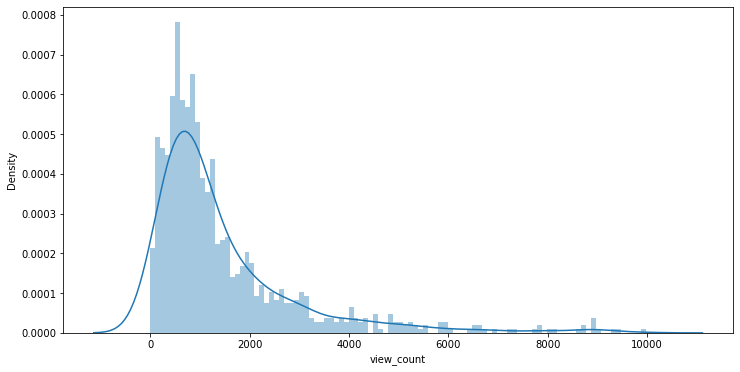

In [97]:
# 이상치 제외 뷰 distplot
plt.figure(figsize=(12, 6))
sns.distplot(df_view_out['view_count'], bins=100)

In [98]:
df_view_out.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.154402,1459.744208,1.582947,15.128823,4.373494
std,0.751299,1534.657182,3.844897,1.096077,1.609481
min,0.000000,4.000000,0.000000,12.000000,3.000000
25%,0.000000,537.000000,0.000000,15.000000,3.000000
50%,0.000000,930.000000,1.000000,15.000000,3.000000
75%,0.000000,1816.500000,2.000000,15.000000,5.000000
max,4.500000,9971.000000,99.000000,30.000000,7.000000


이상치(10,000 뷰 이상) 제외 (64건)
- 기준(10점) : 최상위권 뷰 > 상위권 뷰 > 평균 뷰 > 하위권 뷰
- 총 1,079(64건 제외)건 중 최소 뷰가 4다. 
- 평균 : 1,459 뷰
- Q1 : 537 뷰 (0 점수)
- Q2 : 930 뷰 (+ 점수)
- Q3 : 1,816 뷰 (++ 점수)
- 최고 기준(5.5% 수준) : 10,000 뷰 (+++점수)

최종 결과(10점) : 
>- 최상위권 뷰(10,000 뷰 이상 - 10점)
>- 상위권 뷰(2,000 뷰 이상 - 7점)
>- 평균 뷰(1,000 뷰 이상 - 5점)
>- 하위권 뷰 (1,000 뷰 미만 - 3점)

In [99]:
# 뷰 점수 부여
df["score_view_count"] = float(0)
df.head()

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,0.0
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,0.0
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,0.0
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,0.0
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,0.0


In [100]:
# score 함수 생성
def score_view_count(data):
    if data >= 10000:
        return 10
    elif (data < 10000) & (data >= 2000):
        return 7
    elif (data < 2000) & (data >= 1000):
        return 5
    else:
        return 3

In [101]:
# 실행
df["score_view_count"] = df["view_count"].apply(score_view_count)
df["score_view_count"]

0        7
1       10
2       10
3       10
4       10
        ..
1138     3
1139     3
1140     3
1141     3
1142     3
Name: score_view_count, Length: 1143, dtype: int64

In [102]:
# 확인
df

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,10
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,10
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,10
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,10
...,...,...,...,...,...,...,...,...,...
1138,해바라기식당,0.0,강원 고성군 - 해산물 요리,119,0,강원도 고성군 거진읍 거진리 29-3,강원도 고성군 거진읍,15,3
1139,메트로폴리스,0.0,강원 고성군 - 카페 / 디저트,119,0,강원도 고성군 죽왕면 문암진리 81-25,강원도 고성군 죽왕면,15,3
1140,BBQ치킨(고성대진점),0.0,강원 고성군 - 닭 / 오리 요리,117,0,강원도 고성군 현내면 대진리 111-7,강원도 고성군 현내면,15,3
1141,일차돌(고성점),0.0,강원 고성군 - 고기 요리,104,0,강원도 고성군 간성읍 신안리 248-2,강원도 고성군 간성읍,15,3


## review_count(리뷰 수)

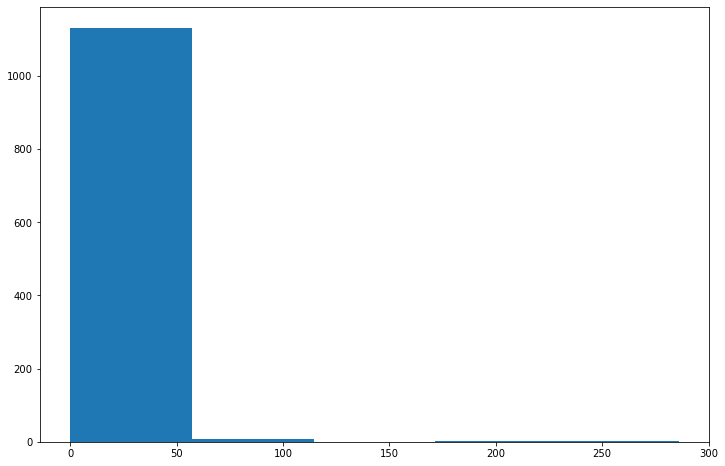

In [103]:
# review_count hist
plt.figure(figsize=(12,8))
plt.hist(df["review_count"], bins=5)
plt.show()

In [104]:
df.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.342257,3595.352581,3.805774,15.358705,4.688539
std,1.097397,13379.869446,15.477482,1.790941,2.029796
min,0.000000,4.000000,0.000000,12.000000,3.000000
25%,0.000000,558.000000,0.000000,15.000000,3.000000
50%,0.000000,1000.000000,1.000000,15.000000,5.000000
75%,0.000000,2046.000000,2.000000,15.000000,7.000000
max,4.500000,297917.000000,286.000000,30.000000,10.000000


In [106]:
# 리뷰가 존재하는 식당만 인덱싱
df_review = df[df['review_count'] != 0]

In [107]:
df_review

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,10
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,10
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,10
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,10
...,...,...,...,...,...,...,...,...,...
1008,식객,0.0,강원 고성군 - 고기 요리,1957,1,강원도 고성군 토성면 원암리 403-1,강원도 고성군 토성면,15,5
1009,거진포구,0.0,강원 고성군 - 해산물 요리,1933,1,강원도 고성군 거진읍 거진리 287-119,강원도 고성군 거진읍,15,5
1010,송지호막국수,0.0,강원 고성군 - 국수 / 면 요리,1726,1,강원도 고성군 죽왕면 오호리 343,강원도 고성군 죽왕면,15,5
1011,금강보신삼계탕,0.0,강원 고성군 - 탕 / 찌개 / 전골,842,1,강원도 고성군 거진읍 거진리 148-28,강원도 고성군 거진읍,15,3


In [108]:
df_review.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,667.000000,667.000000,667.000000,667.000000,667.000000
mean,0.586507,5501.295352,6.521739,15.614693,5.350825
std,1.386192,17260.457124,19.824850,2.311343,2.222566
min,0.000000,4.000000,1.000000,12.000000,3.000000
25%,0.000000,683.000000,1.000000,15.000000,3.000000
50%,0.000000,1463.000000,2.000000,15.000000,5.000000
75%,0.000000,3146.000000,4.000000,15.000000,7.000000
max,4.500000,297917.000000,286.000000,30.000000,10.000000


In [115]:
# 이상치 확인
df_review["review_count"].sort_values(ascending=False)

16      286
17      196
31      187
32      178
60      102
       ... 
459       1
458       1
457       1
456       1
1012      1
Name: review_count, Length: 667, dtype: int64

In [133]:
# 상위 25% 리뷰 데이터 확인
df_review_25 = df[df["review_count"] >= 4]
df_review_25.describe()

,search_point,view_count,review_count,score_search_point,score_view_count
count,186.000000,186.000000,186.000000,186.000000,186.000000
mean,2.103226,16259.413978,19.333333,17.204301,7.752688
std,1.926203,30118.187213,34.419301,3.963507,1.834539
min,0.000000,746.000000,4.000000,12.000000,3.000000
25%,0.000000,2900.000000,5.000000,15.000000,7.000000
50%,3.450000,5526.000000,9.000000,15.000000,7.000000
75%,3.900000,18268.250000,16.000000,20.000000,10.000000
max,4.500000,297917.000000,286.000000,30.000000,10.000000


In [163]:
# 상위 리뷰 데이터 확인
df_review_out = df[df["review_count"] >= 50]
len(df_review_out) / len(df_review)

0.019490254872563718

- 기준(10점) : 최상위권 리뷰 > 상위권 리뷰 > 평균 리뷰 > 하위권 리뷰
- 총 1,143건 중 리뷰가 있는 667건(1개:275건, 2개:139건, 3건:67건) 약 70%가 1~3건이다.
- 평균 : 6.5 리뷰
- Q1 : 1 리뷰 (0 점수)
- Q2 : 2 리뷰 (+ 점수)
- Q3 : 4 리뷰 (++ 점수)
- 최고 기준(5% 수준) : 14 리뷰 (+++점수)

최종 결과(10점) : 
>- 최상위권 뷰( 50 리뷰 이상 - 10점)
>- 상위권 뷰(15 리뷰 이상 - 7점)
>- 평균 뷰(2 리뷰 이상 - 5점)
>- 하위권 뷰 (0 리뷰 - 3점)

In [164]:
# 리뷰 점수 부여
df["score_review_count"] = float(0)
df.head()

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count,score_review_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7,0.0
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,10,0.0
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,10,0.0
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,10,0.0
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,10,0.0


In [165]:
# score 함수 생성
def score_review_count(data):
    if data >= 50:
        return 10
    elif (data < 50) & (data >= 15):
        return 7
    elif (data < 15) & (data >= 2):
        return 5
    else:
        return 3

In [166]:
# 실행
df["score_review_count"] = df["review_count"].apply(score_review_count)
df["score_review_count"]

0       5
1       7
2       7
3       5
4       5
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: score_review_count, Length: 1143, dtype: int64

In [167]:
# 확인
df

,title,search_point,etc,view_count,review_count,address,dongname,score_search_point,score_view_count,score_review_count
0,모녀가리비,4.5,강원 속초시 - 해산물 요리,4174,10,강원도 속초시 대포동 964-13,강원도 속초시 대포동,30,7,5
1,속초붉은대게수산,4.4,강원 속초시 - 해산물 요리,34739,17,강원도 속초시 중앙동 472-5,강원도 속초시 중앙동,30,10,7
2,단천식당,4.3,강원 속초시 - 탕 / 찌개 / 전골,30457,38,강원도 속초시 청호동 842,강원도 속초시 청호동,25,10,7
3,왕박골식당,4.3,강원 속초시 - 국수 / 면 요리,24858,14,강원도 속초시 장사동 525-3,강원도 속초시 장사동,25,10,5
4,속초751샌드위치,4.3,강원 속초시 - 브런치 / 버거 / 샌드위치,16463,14,강원도 속초시 교동 780-55,강원도 속초시 교동,25,10,5
...,...,...,...,...,...,...,...,...,...,...
1138,해바라기식당,0.0,강원 고성군 - 해산물 요리,119,0,강원도 고성군 거진읍 거진리 29-3,강원도 고성군 거진읍,15,3,3
1139,메트로폴리스,0.0,강원 고성군 - 카페 / 디저트,119,0,강원도 고성군 죽왕면 문암진리 81-25,강원도 고성군 죽왕면,15,3,3
1140,BBQ치킨(고성대진점),0.0,강원 고성군 - 닭 / 오리 요리,117,0,강원도 고성군 현내면 대진리 111-7,강원도 고성군 현내면,15,3,3
1141,일차돌(고성점),0.0,강원 고성군 - 고기 요리,104,0,강원도 고성군 간성읍 신안리 248-2,강원도 고성군 간성읍,15,3,3


In [168]:
# 저장
df.to_csv("속초-고성_맛집(점수).csv", encoding='utf-8', index=False)